In [175]:
import numpy as np
import pandas as pd

crime_raw_data = pd.read_csv('../data/Crime_data.csv', encoding='euc-kr')

In [176]:
crime_raw_data.head()


,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [177]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
구분      310 non-null object
죄종      310 non-null object
발생검거    310 non-null object
건수      310 non-null float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [178]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력', nan], dtype=object)

In [179]:
crime_raw_data['죄종'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
65504     True
65505     True
65506     True
65507     True
65508     True
65509     True
65510     True
65511     True
65512     True
65513     True
65514     True
65515     True
65516     True
65517     True
65518     True
65519     True
65520     True
65521     True
65522     True
65523     True
65524     True
65525     True
65526     True
65527     True
65528     True
65529     True
65530     True
65531     True
65532     True
65533     True
Name: 죄종, Length: 65534, dtype: bool

In [180]:
crime_raw_data[crime_raw_data['죄종'].isnull()]

,구분,죄종,발생검거,건수
310,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN
316,NaN,NaN,NaN,NaN
317,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN
319,NaN,NaN,NaN,NaN


In [181]:
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
구분      310 non-null object
죄종      310 non-null object
발생검거    310 non-null object
건수      310 non-null float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


In [182]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종","발생검거"], 
    aggfunc=[np.sum])

crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [183]:
crime_station.columns

MultiIndex(levels=[['sum'], ['건수'], ['강간', '강도', '살인', '절도', '폭력'], ['검거', '발생']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[None, None, '죄종', '발생검거'])

In [184]:
crime_station.columns = crime_station.columns.droplevel([0,1])
crime_station.columns

MultiIndex(levels=[['강간', '강도', '살인', '절도', '폭력'], ['검거', '발생']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['죄종', '발생검거'])

In [185]:
crime_station['강도', '검거']

구분
강남     26.0
강동     13.0
강북      4.0
강서     10.0
관악     10.0
광진      6.0
구로     13.0
금천      7.0
남대문     4.0
노원      9.0
도봉      5.0
동대문    12.0
동작      7.0
마포      7.0
방배      5.0
서대문     4.0
서부      2.0
서초      5.0
성동      5.0
성북      3.0
송파     12.0
수서     16.0
양천      7.0
영등포    14.0
용산     10.0
은평      5.0
종로      3.0
종암      5.0
중랑     14.0
중부      3.0
혜화      6.0
Name: (강도, 검거), dtype: float64

In [186]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [187]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


In [188]:
police_station_pos = {
    '강남':'강남구', '강동':'강동구', '강서':'강서구', '관악':'관악구',
    '구로':'구로구', '남대문':'중구', '금천':'금천구', '동작':'동작구',
    '노원':'노원구', '도봉':'도봉구', '혜화':'종로구', '광진':'광진구',
    '마포':'마포구', '방배':'서초구', '강북':'강북구', '서부':'은평구',
    '서대문':'서대문구', '서초':'서초구', '성동':'성동구',
    '성북':'성북구', '송파':'송파구', '수서':'강남구', '양천':'양천구',
    '영등포':'영등포구', '용산':'용산구', '은평':'은평구', '종로':'종로구',
    '종암':'성북구', '중랑':'중랑구', '중부':'중구', '동대문':'동대문구'
}

In [189]:
police_station_pos.get('동대문')

'동대문구'

In [190]:
tmp = [police_station_pos.get(idx) for idx, row in crime_station.iterrows()]
tmp

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [191]:
crime_station['구'] = tmp
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구
광진,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0,광진구
구로,181.0,273.0,13.0,10.0,9.0,9.0,861.0,1910.0,2680.0,3164.0,구로구
금천,143.0,175.0,7.0,7.0,6.0,6.0,654.0,1264.0,1946.0,2193.0,금천구
남대문,52.0,57.0,4.0,5.0,1.0,1.0,429.0,946.0,832.0,890.0,중구


In [192]:
crime_station['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '중구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '성동구',
       '성북구', '송파구', '양천구', '영등포구', '용산구', '종로구', '중랑구'], dtype=object)

In [193]:
len(crime_station['구'].unique())

25

In [194]:
crime_station.to_csv('../data/crime_station.csv' , sep=',', encoding='UTF-8')

In [195]:
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)
crime_gu

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0
광진구,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0
구로구,181.0,273.0,13.0,10.0,9.0,9.0,861.0,1910.0,2680.0,3164.0
금천구,143.0,175.0,7.0,7.0,6.0,6.0,654.0,1264.0,1946.0,2193.0
노원구,142.0,159.0,9.0,6.0,6.0,5.0,740.0,1857.0,2124.0,2516.0


In [196]:
crime_gu['강도검거']/crime_gu['강도발생']

구
강남구     1.076923
강동구     0.928571
강북구     0.800000
강서구     1.000000
관악구     0.833333
광진구     0.545455
구로구     1.300000
금천구     1.000000
노원구     1.500000
도봉구     1.000000
동대문구    1.200000
동작구     1.000000
마포구     1.750000
서대문구    0.800000
서초구     0.769231
성동구     1.666667
성북구     1.000000
송파구     0.800000
양천구     1.000000
영등포구    0.736842
용산구     1.111111
은평구     0.777778
종로구     0.750000
중구      0.875000
중랑구     1.000000
dtype: float64

In [197]:
crime_gu[['강도검거', '살인검거']].div(crime_gu['강도발생'], axis=0)

,강도검거,살인검거
구,,
강남구,1.076923,0.128205
강동구,0.928571,0.357143
강북구,0.800000,1.200000
강서구,1.000000,1.000000
관악구,0.833333,0.583333
광진구,0.545455,0.363636
구로구,1.300000,0.900000
금천구,1.000000,0.857143
노원구,1.500000,1.000000


In [198]:
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[num].div(crime_gu[den].values)

,강간검거,강도검거,살인검거,절도검거,폭력검거
구,,,,,
강남구,0.800388,1.076923,1.000000,0.534709,0.881309
강동구,0.950000,0.928571,1.250000,0.514253,0.869960
강북구,0.732719,0.800000,0.857143,0.549918,0.893449
강서구,0.869091,1.000000,1.111111,0.548156,0.863920
관악구,0.819876,0.833333,1.166667,0.445554,0.836785
광진구,0.838710,0.545455,1.000000,0.400986,0.840719
구로구,0.663004,1.300000,1.000000,0.450785,0.847029
금천구,0.817143,1.000000,1.000000,0.517405,0.887369
노원구,0.893082,1.500000,1.200000,0.398492,0.844197


In [199]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values)*100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


In [200]:
crime_gu = crime_gu.drop(columns=num)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


In [201]:
crime_gu[target] > 100

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,False,True,False,False,False
강동구,False,False,True,False,False
강북구,False,False,False,False,False
강서구,False,False,True,False,False
관악구,False,False,True,False,False
광진구,False,False,False,False,False
구로구,False,True,False,False,False
금천구,False,False,False,False,False
노원구,False,True,True,False,False


In [202]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906
구로구,273.0,10.0,9.0,1910.0,3164.0,66.300366,100.000000,100.000000,45.078534,84.702908
금천구,175.0,7.0,6.0,1264.0,2193.0,81.714286,100.000000,100.000000,51.740506,88.736890
노원구,159.0,6.0,5.0,1857.0,2516.0,89.308176,100.000000,100.000000,39.849219,84.419714


In [203]:
crime_gu.rename(columns = {
    '강간발생':'강간',
    '강도발생':'강도',
    '살인발생':'살인',
    '절도발생':'절도',
    '폭력발생':'폭력'},
                inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


In [204]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000
강동구,0.307692,0.358974,0.310078,0.488988,0.632184
강북구,0.538462,0.128205,0.420543,0.340675,0.694153
강서구,0.692308,0.256410,0.532946,0.544187,0.800600
관악구,0.461538,0.307692,0.624031,0.586284,0.808346


In [205]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516


In [206]:
POP_Seoul = pd.read_csv('../data/Seoul_pop.csv', index_col=1, encoding='utf-8')
POP_Seoul.head()

,Unnamed: 0,인구수,남성,여성,내국인,남성내국인,여성내국인,외국인,남성외국인,여성외국인,세대당인구,고령자,외국인비율,고령비율,여성비율
구,,,,,,,,,,,,,,,
종로구,1,164348,79962,84386,154549,75749,78800,9799,4213,5586,2.09,26429,0.059623,0.160811,0.513459
중구,2,135139,66582,68557,126082,62376,63706,9057,4206,4851,2.07,21655,0.067020,0.160242,0.507307
용산구,3,245411,119985,125426,229909,111262,118647,15502,8723,6779,2.12,37238,0.063168,0.151737,0.511085
성동구,4,314551,154672,159879,306532,150937,155595,8019,3735,4284,2.28,41752,0.025493,0.132735,0.508277
광진구,5,371671,180206,191465,357149,173946,183203,14522,6260,8262,2.21,44470,0.039072,0.119649,0.515146


In [207]:
crime_gu_norm[['인구수']] = POP_Seoul[['인구수']]
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수
구,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,557865
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,438225
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,327511
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608361
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522292


In [208]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄
구,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,557865,0.876923
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,438225,0.419583
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,327511,0.424407
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608361,0.565290
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522292,0.557578


In [209]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄,검거
구,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,557865,0.876923,84.328112
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,438225,0.419583,85.255701
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,327511,0.424407,76.664569
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608361,0.565290,85.623335
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522292,0.557578,78.710965


In [210]:
crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
강남구     0.876923
영등포구    0.745508
송파구     0.612240
강서구     0.565290
구로구     0.560174
Name: 범죄, dtype: float64

In [211]:
crime_gu_norm['검거'].sort_values(ascending=False).head()

구
도봉구     89.205322
성동구     86.220613
동대문구    85.666760
강서구     85.623335
중랑구     85.377882
Name: 검거, dtype: float64

In [212]:
crime_gu_norm['검거'].sort_values().head()

구
종로구     61.930524
동작구     70.593867
영등포구    72.146149
광진구     72.517393
송파구     74.821606
Name: 검거, dtype: float64

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager,  rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/Library/Fonts/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

In [214]:
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄,검거
구,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,557865,0.876923,84.328112
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,438225,0.419583,85.255701
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,327511,0.424407,76.664569
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608361,0.565290,85.623335
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522292,0.557578,78.710965


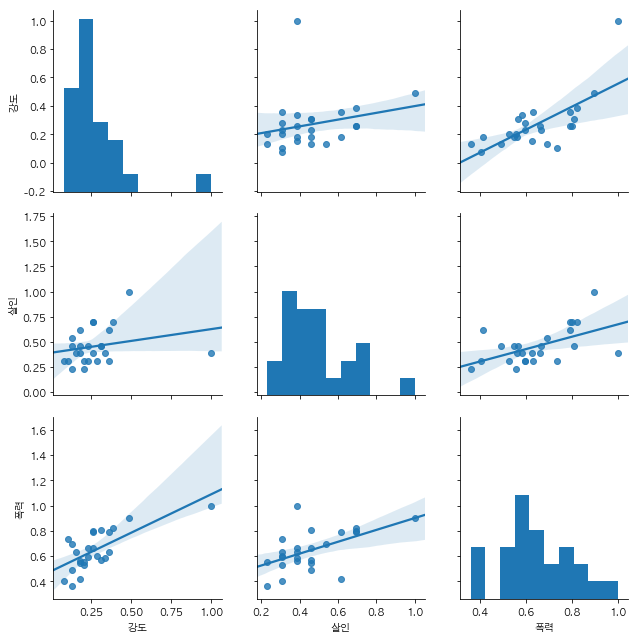

In [215]:
sns.pairplot(crime_gu_norm, vars=["강도", "살인", "폭력"], kind='reg', size=3)

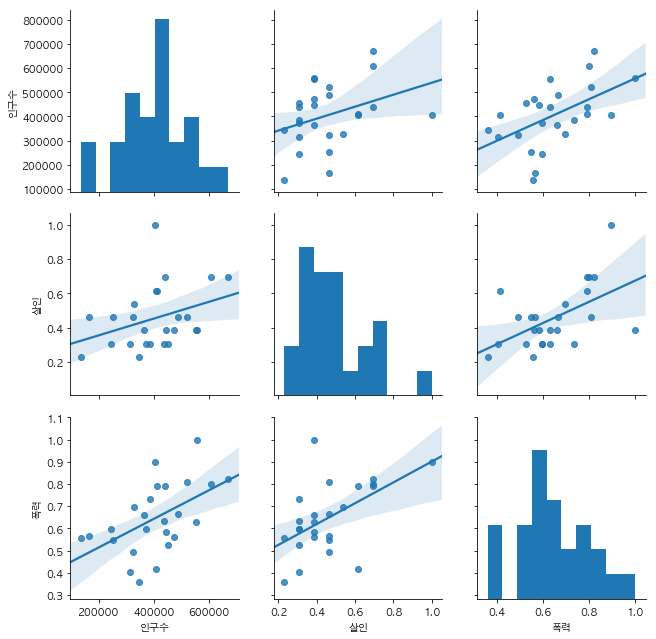

In [216]:
sns.pairplot(crime_gu_norm, vars=["인구수", "살인", "폭력"], kind='reg', size=3)

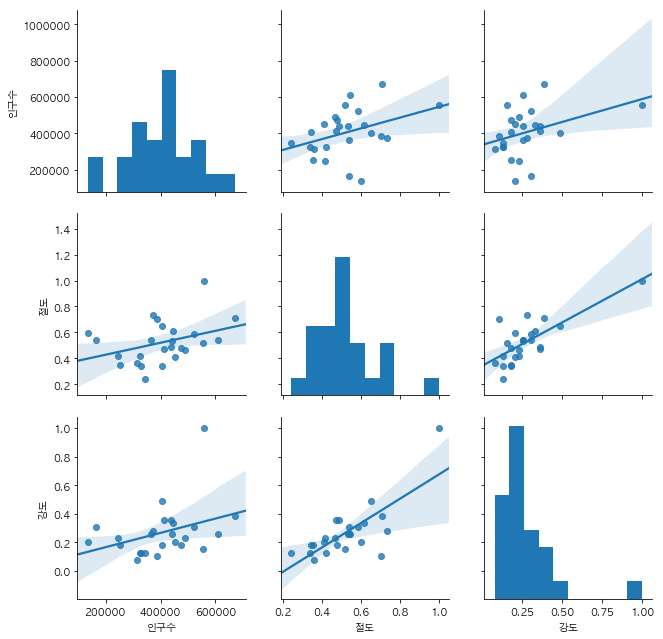

In [217]:
sns.pairplot(crime_gu_norm, vars=["인구수", "절도", "강도"], kind='reg', size=3)

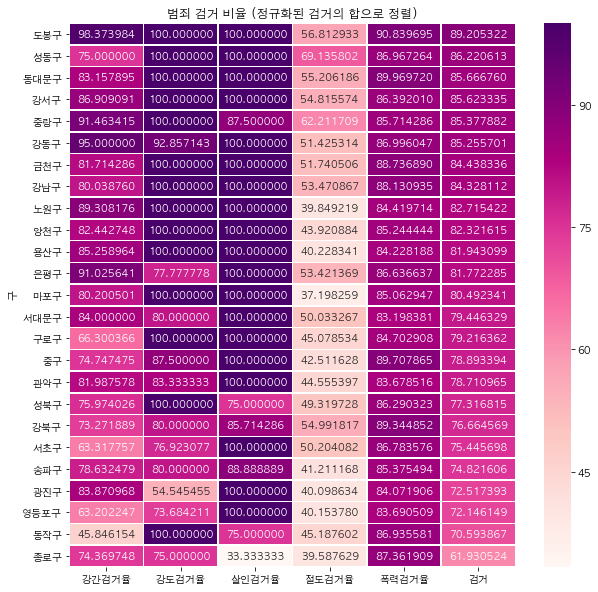

In [239]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거',ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')

plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

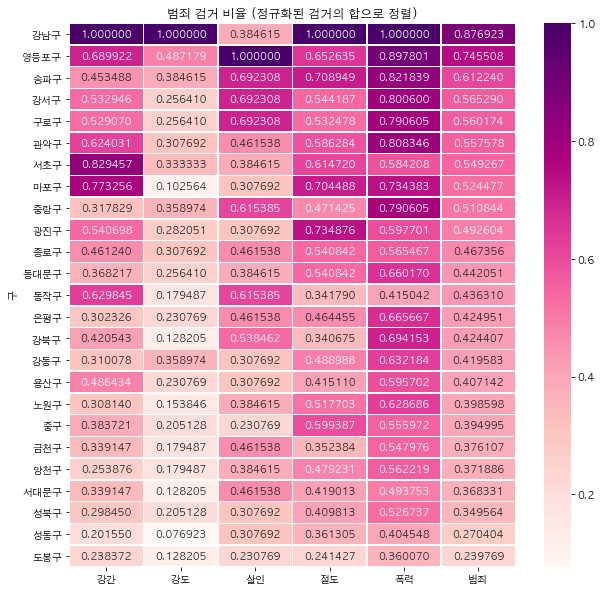

In [240]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='범죄',ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')

plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

In [222]:
crime_gu_norm.to_csv('../data/crime_seoul_final.csv', sep=',', encoding='utf-8')

In [225]:
import folium

m=folium.Map(location=[45.5236, -122.6750])
m


In [229]:
folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', zoom_start=13)

In [232]:
folium.Map(location=[45.5236, -122.6750], tiles='Stamen Watercolor', zoom_start=13)

In [237]:
my_map = folium.Map(location=[45.372, -121.6972], zoom_start=12,
                    tiles='Stamen Terrain')

folium.Marker([45.3288, -121.6625],popup='<i>Mt. Hood Meadows</i>').add_to(my_map)
folium.Marker([45.3311, -121.7113],popup='<b>Timberline Lodge</b>').add_to(my_map)

my_map

In [241]:
m = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', zoom_start=13)

folium.CircleMarker(location=[45.5215, -122.6261], radius=50,
                   popup='Laurelhurst Park', color='#3186cc',
                   fill=True, fill_color='#3186cc').add_to(m)
m

In [243]:
m = folium.Map(location=[46.1991, -122.1889], tiles='Stamen Terrain', zoom_start = 13)
m.add_child(folium.LatLngPopup())
m

In [244]:
import pandas as pd
import folium
import json

crime_gu_norm = pd.read_csv('../data/crime_seoul_final.csv',
                           index_col=0,encoding='utf-8')
geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄,검거
구,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,557865,0.876923,84.328112
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,438225,0.419583,85.255701
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,327511,0.424407,76.664569
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608361,0.565290,85.623335
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522292,0.557578,78.710965


In [245]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

my_map.choropleth(geo_data=geo_str, data = crime_gu_norm['살인'],
                 columns = [crime_gu_norm.index, crime_gu_norm['살인']],
                 fill_color = 'PuRd', key_on = 'feature.id',
                 fill_opacity=0.7, line_opacity=0.2,
                 legend_name = '정규화된 살인 발생 건수')

my_map

In [249]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

my_map.choropleth(geo_data=geo_str, data = crime_gu_norm['강간'],
                 columns = [crime_gu_norm.index, crime_gu_norm['강간']],
                 fill_color = 'PuRd', key_on = 'feature.id',
                 fill_opacity=0.7, line_opacity=0.2,
                 legend_name = '정규화된 강간 발생 건수')

my_map

In [248]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

my_map.choropleth(geo_data=geo_str, data = crime_gu_norm['범죄'],
                 columns = [crime_gu_norm.index, crime_gu_norm['범죄']],
                 fill_color = 'PuRd', key_on = 'feature.id',
                 fill_opacity=0.7, line_opacity=0.2,
                 legend_name = '정규화된 범죄 발생 건수')

my_map

In [251]:
tmp_criminal = crime_gu_norm['범죄']/crime_gu_norm['인구수']

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

my_map.choropleth(geo_data=geo_str, data = tmp_criminal,
                 columns = [crime_gu_norm.index, tmp_criminal],
                 fill_color = 'PuRd', key_on = 'feature.id',
                 fill_opacity=0.7, line_opacity=0.2,
                 legend_name = '인구대비 범죄 현황')

my_map

In [252]:
col = ['살인검거', '강도검거', '강간검거', '절도검거', '폭력검거']

crime_station_simple = crime_station[col]
crime_station_simple.head()

,살인검거,강도검거,강간검거,절도검거,폭력검거
구분,,,,,
강남,3.0,26.0,269.0,1129.0,2096.0
강동,5.0,13.0,152.0,902.0,2201.0
강북,6.0,4.0,159.0,672.0,2482.0
강서,10.0,10.0,239.0,1070.0,2768.0
관악,7.0,10.0,264.0,937.0,2707.0


In [254]:
col = ['lat', 'lng']

crime_station_simple[col] = crime_station[col]
crime_station_simple.head()

KeyError: "['lat' 'lng'] not in index"